In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# The Wald Test

**Objectives**
At the end of this lecture, you will be able to do the following:
- Construct one-sample and two-sample Wald tests with specified asymptotic level
- Compute the asymptotic p-value of a Wald test
- Construct the Wald test from an asymptotically normal maximum likelihood estimator
- Perform the likelihood ratio test for a family of hypothesis testing questions.

Тест гипотез состоит из
- 2 типа ошибок
- power function
- p-value
- confidece interval
- rejection region

Можно ли построить тест без использования шага - построить Confidence Interval. По факту мы видим связь между тестом и CI, и оба эти понятия основываются на одном и том-же строительном блоке, какой это блок? Это утверждение Асимптотической нормальности для оценщика $\hat{\theta}$ который отцентроман и масштабирован правильно, для схождения к Гауссову.

Мы всегда строим интервалы $[A,B]$, тоесть конечных размеров, которые более естевственные, которые дают нам двух сторонний тест.

А что если мы хотим построить интервал $[-\infty,B]$ или $[A,+\infty]$ к примеру если мы тестируем разницу в уровне холестерина.

Чтобы строить тест без использования CI мы поступим так - мы перестанем относиться к CI как к "black box", а откроем эту "коробку" и возмем от туда необходимое и используем этот механизм для построение **Wald Test** - асимптогтическую нормальность оценки параматре, из которой мы сможет построить (только) асимптотический уровень доверия или асимптотическое p-value.

**А если размер выборки будет слишком маленький?** \
Тогда мы **не сможем** применять асимптотически-нормельные результаты, такие как ЦПТ. Для этого мы сможем применить **t-Test**. Он основан на **Неасимптотическом распределении** среднего значения, пересчитанного на стандартное отклонение выборки. Основываясь на его распределении мы сможем построить неасимптотисческое p-Value. К сожалению этот тест строиться на предположении что данные вышли из Гаусово распределенеия, которое нужно проверять на практике.

# Самое время задать вопрос - А почему асимптотичность это важно?

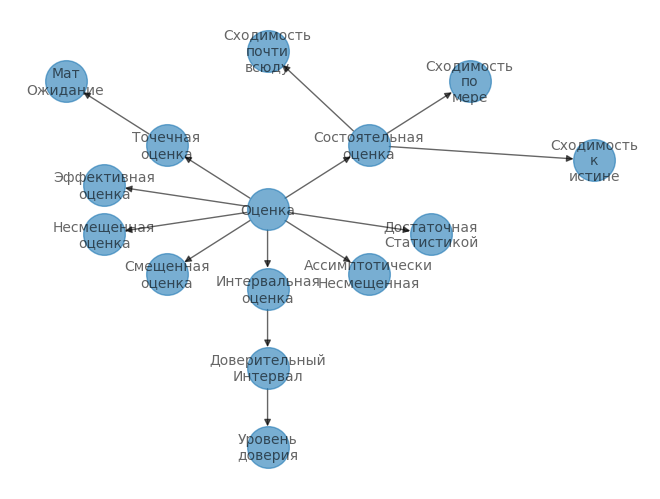

In [15]:
import knowledge as kn
d = {
    "Оценка":{
        "Состоятельная оценка":{
                "Сходимость к истине":[],
                "Сходимость по мере":[],
                "Сходимость почти всюду":[]
            },
        "Точечная оценка":{"Мат Ожидание":[]},
        "Эффективная оценка":[],
        "Несмещенная оценка":[],
        "Cмещенная оценка":[],
        "Интервальная оценка":{
            "Доверительный Интервал":{
                "Уровень доверия":[]
            }
        },
        "Ассимптотически Несмещенная": [],
        "Достаточная Статистикой": []
    }
}
kn.show_graph(d,'Оценка')

- Consistency
- Asymptotic Normality
- Efficiency
- Bias
- Robustness
- Simplification of Analysis
- Practical Application and Interpretation
----- 
- Consistency (Согласованность)
- Reliability (Надежность)
- Accuracy (Точность)

- Bias Reduction (Уменьшение смещения)
- Simplicity (Простота)
- Precision (Прецизионность)
- Efficiency (Эффективность)

**Состоятельная оценка** - сходимость оценки к истенное в вероятности при $n\to\infty$

$$\hat\theta_n \xrightarrow [n \to \infty ]{\mathbb{P}} \theta$$
или можно подругому это записать
$$\lim_{n\to\infty}\mathcal{P}(|\hat\theta-\theta|)<\epsilon)=1,\quad\epsilon>0$$
То есть почти достоверным является событие, заключающееся в том, что состоятельная оценка отклоняется по модулю от значения параметра на сколь угодно малую положительную величину, если объем выборки достаточно велик.

**Состоятельность** — это, по сути, гарантия того, что оценщик "работает" в долгосрочной перспективе и что наши оценки будут улучшаться по мере сбора большего количества информации.

Для нахождения **точечных оценок** разработан ряд методов:
- метод моментов,
- метод максимального правдоподобия,
- графический метод,
- метод наименьших квадратов.

**Несмещенная оценка** статика $\hat\theta$ явлется не смещенной если она поспадает с мат ожиданием для любого **фиксированного $n$.**

> фикированное $n$ обозначает, что мы проводим оценку статистики $\hat\theta$ для одно и того же числа $n$. таким образом мы смещаем свой фокус внимание с "перебора подходящего $n$" на свойство самой оценки, при определенном, заранее заданном количестве наблюдений.


**Интервальная оценка** - это значит что ее истенный параметр лежит между 

# Оценка

$\hat\theta=\stackrel{\rightarrow}{\hat\theta(x_n)}$Ассимптотическая несмещенность 

**состоятельной** -  это значит что в вероятности она сходиться к оцениваемому параметру $\theta$
$$\hat\Theta\stackrel{P}\to_{n\to\infty}\theta$$
эффективной
Ассимптотичност - не зависет от размера выборки.

**ППТМПУД**

**Правильность при большом количестве данных**: Если у тебя много данных, хороший оценщик должен показывать близкие к настоящему значению результаты. Это значит, что чем больше у тебя информации, тем точнее твои выводы.

**Прогнозируемость**: Когда данные начинают вести себя предсказуемо при увеличении объёма, мы можем делать выводы и принимать решения, опираясь на эти закономерности. Это как знать, что если ты будешь много работать, ты заработаешь больше денег.

**не смещенная оценка** - чтобы мат ожидание оценки было равно истинному значениею параметра.

**Точность**: Мы хотим, чтобы наши методы использовали имеющуюся информацию максимально эффективно, чтобы наши оценки были как можно точнее. Представь, что ты стреляешь из лука — асимптотическая эффективность помогает тебе попадать в цель чаще.

**Минимум ошибок**: С увеличением данных ошибка между тем, что мы оценили, и реальностью должна уменьшаться. Это как научиться делать что-то новое: чем больше практики, тем меньше ошибок.

**Прочность**: Хороший оценщик должен работать даже если данные не идеальны. В реальном мире редко бывает всё идеально, поэтому нам нужны методы, которые могут справиться с несовершенством.

**Упрощение**: Асимптотические свойства помогают упростить сложные математические вычисления. Это как если бы ты мог пройти через сложную видеоигру, зная все секреты и коды.

**Доверие к результатам**: Когда мы знаем, что наши методы работают хорошо с большим количеством данных, мы можем доверять выводам, которые мы делаем, и принимать на их основе решения.

Когда мы получаем оценщик, мы хотим чтобы у него были классные приятные полезные свойстваю. Если быть более конкретным, то нам обычно нужно чтобы у него было свойство Согласованности Consistency


https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0


https://ru.wikipedia.org/wiki/%D0%AD%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0

# The Wald Test

Как обычно определим
- статистическую модель $(E, \{\mathbb{P}_\theta\}_{\theta\in\Theta})$
- Оценку параметра $\hat\theta$ токой что $\dfrac{\hat\theta-\theta}{\sqrt{\widehat{\text{var}}(\hat\theta)} }\xrightarrow [n \to \infty ]{(d)} \mathcal{N}(0,1)$, где $\widehat{\text{var}}(\hat\theta)$ это оценка дисперсии $\hat\theta$
- к примеру, в случае Bernoulli:\
для построение теста Wald ключевой компонент - это асимптотические свойства оценки $\hat\theta$ - а конкретно - **асимптотическая нормальность** $\hat\theta$. мы нормализуем отклонение  от среднего на оценку дисперсии оценщика.\
Дисперсия оценки $p$ равна  $\text{var}(\hat{p})=\dfrac{p(1-p)}{n}$\
Конечно мы не может оценить оценку дисперсии оценки, потому-что оценка зависит от **истенного параметра** $p$ нам нужно оценить его!
Чтобы это сделать, нам просто нужно добавить "шапочку" над всем что мы не знаем.
- итого $\widehat{\text{var}}(\hat{p})=\dfrac{\hat{p}(1-\hat{p})}{n}$, Соотв $\hat{p}=\overline{X}_n$

Подставим оценку дисперсии к оценке параметра и получим
$$\dfrac{\hat{p}-p}{\sqrt\frac{\hat{p}(1-\hat{p})}{n}}=\dfrac{\hat{p}-p}{\frac{\sqrt{\hat{p}(1-\hat{p})}}{\sqrt{n}}}=\sqrt{n}\dfrac{\hat{p}-p}{\sqrt{\hat{p}(1-\hat{p})}}\xrightarrow [n \to \infty ]{(d)} \mathcal{N}(0,1)$$

Для получение асимптотически нормального мы использовали ЦПТ и теорему Слуцкого.\

Применение теоремы Слуцкого: Теорема Слуцкого может использоваться для обоснования использования оцененной дисперсии вместо истинной дисперсии в формуле теста, особенно при больших выборках, где оцененная дисперсия сходится по вероятности к истинной.


**Wald test** - это тест статистика как нормированная оценка параметра находится от параметра нулевой гипотезы. 

| $$\quad\quad\quad\quad\quad\quad$$ | $$H_0: \theta=\theta_0\\ H_1: \theta\neq\theta_0$$ | $$H_0: \theta\leq\theta_0\\ H_1: \theta>\theta_0$$ | $$H_0: \theta\geq\theta_0\\ H_1: \theta<\theta_0$$ |
| --- |:---:|:---:|:---:|
| Wald Test $\psi$ | $$\mathbb{1}\{|W|>q_{\alpha/2}\}$$ | $$\mathbb{1}\{|W|>q_{\alpha}\}$$ | $$\mathbb{1}\{|W|<-q_{\alpha}\}$$ |
|  | two sided | one sided | one sided |

$$W:=\dfrac{\hat\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat\theta)}}$$

$q_{\alpha/2}$= это квантиль

# Теорема Слуцкого

**Теорема Случкого** позволяет делать выводы о поведении функций случайных величин на основе известного поведения других случайных величин, в том числе и о сходимости этих функций к пределам.  Это особенно полезно при работе с асимптотическими свойствами оценок, так как часто нам известны свойства базовых случайных величин, а интересующие нас функции этих величин (например, дисперсия) могут быть более сложными для анализа напрямую. Теорема Слуцкого позволяет заменять асимптотическую дисперсию на эмпирическую (оцененную на основе данных) в расчетах, когда размер выборки увеличивается.

 Теорема используется для доказательства того, что нормированная оценка (например, $\sqrt{n}(\hat\theta-\theta)$) сходится по распределению к нормальному распределению. После этого, с помощью теоремы Слуцкого, можно утверждать, что добавление или умножение этой оценки на сходящуюся по вероятности последовательность (например, оценка стандартного отклонения) также будет иметь предел распределения, который можно использовать для дальнейшего анализа.

К примеру у нас есть последовательность iid случайных велечин $X_1,\dots,X_2$ с ожиданием $\mu$ и дисперсией $\sigma^2$. Рассмотрим Оценка среднего
$$\bar{X}_n=\dfrac{1}{n}\sum_{i=1}^n X_i$$

По закону **больших чисел** оценка среднего сходится к $\mu$, а по **центральной предельной теореме**, нормирование отклонения от среднего сходится по распределению к $\sqrt{n}(\bar{X}_n-\mu)\xrightarrow [n \to \infty ]{(d)} \mathcal{N}(0,1)$

Допустим нам нужно оценить дисперсию $\bar{X}_n$.

Оценка дисперсии определяется как:
$$\text{var}(X)=\dfrac{1}{n}\sum_{i=1}^n(X_i-\bar{X}_n)^2$$

Согласно **теореме Случкого** если последовательности случайных величин

$Y_n\xrightarrow [n \to \infty ]{\mathbb{P}}c$ и $Z_n\xrightarrow [n \to \infty ]{\mathbb{P}}Z$, тогда $Y_nZ_n\xrightarrow [n \to \infty ]{\mathbb{P}}cZ$, а также $Y_n+Z_n\xrightarrow [n \to \infty ]{\mathbb{P}}c+Z$. А для не прерывной функции $g(Y_n)\xrightarrow [n \to \infty ]{\mathbb{P}}g(c)$

суть в том что в CI мы используем Z-test который работает со средним. $(\bar{X}_n-\mu)\sigma^2$ в тесте Wald мы может работать с любой оценкой, главное что бы она была асимптотически нормальной вокруг истенного параметра.

https://dzen.ru/video/watch/617c6f1da1b9e120347e9708?rid=281153166.314.1712917502071.89560&t=8

# Asymptotic level of the wald test

рассмотрим друх сторонний тест 

$$
H_0: \theta=\theta_0\\
H_1: \theta\neq\theta_0
$$

так как у нас есть только одно значение в нашем сценарии теста. тогда мы будем использовать это знание для проверки худшего сценария
$$\lim_{n\to\infty}\mathbb{P}_{\theta_0}[\psi=1]=\lim_{n\to\infty}\mathbb{P}_{\theta_0}[|W|>q_{\alpha/2}]$$

мы знаем что $\psi=1$ это когда мы отклоняем нулевую гепотезу. мы может подсчитать вероятность теста опровегнуть нулевую гипотезу при том что она верна. тоесть это ошибка первого рода.


Вспомним что $W=\dfrac{\hat\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat\theta)}}\xrightarrow [n \to \infty ]{(d)} \mathcal{N}(0,1)$
получается что мы занем что у W нормальное распределение. тогда можно это применить к тесту. 

$$\lim_{n\to\infty}\mathbb{P}_{\theta_0}[\psi=1]\\
\quad=\lim_{n\to\infty}\mathbb{P}_{\theta_0}[|W|>q_{\alpha/2}]\\
\quad=\mathbb{P}_{\theta_0}[|Z|>q_{\alpha/2}]=\alpha$$

на последнем шаге нам уже не нужно использовать предел, потому что наша переменная $Z$ уже ведет себя как нормальная гаусова

Получается что наша переменная $W$ находится  в rejection region. 

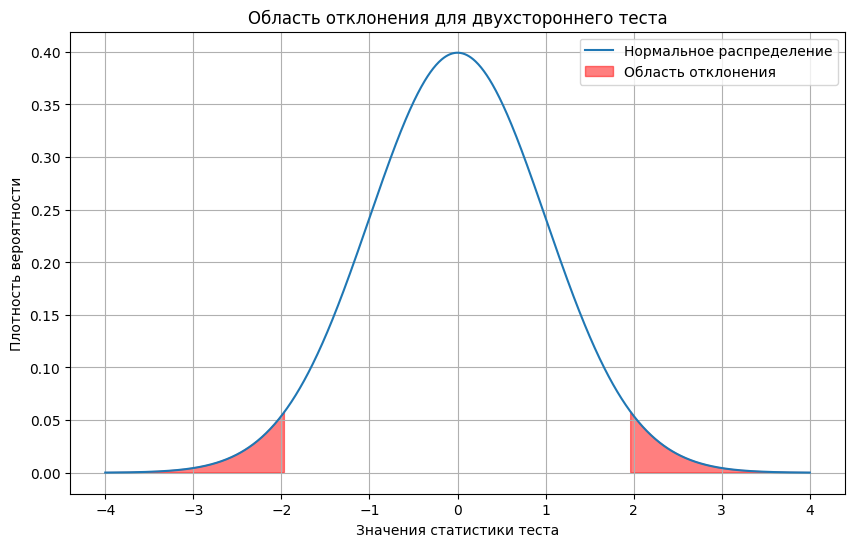


Мы доказали что вероятность ошибки первого рода составляет $\alpha$, важно чтобы мы сохраняли то же значение $\theta_0$ в подсчета вероятности что и в тесте. 

# Asymptotic level of the wald test

рассмотрим односторонний тест 

$$
H_0: \theta\leq\theta_0\\
H_1: \theta>\theta_0
$$

также подсчитаем вероятность ошибки первого рода для любой $\theta\leq\theta_0$

$$\lim_{n\to\infty}\mathbb{P}_{\color{red}{\theta}}[\psi=1]=\lim_{n\to\infty}\mathbb{P}_{\color{red}{\theta}}[W>q_{\alpha}]\\
\quad=\lim_{n\to\infty}\mathbb{P}_{\color{red}{\theta}}\left[\dfrac{\hat\theta-{\color{blue}{\theta_0}}}{\sqrt{\widehat{\text{var}}(\theta)}}>q_\alpha\right] (1)$$

На это шаге хотелось бы уже сказать что результат сходится к $\alpha$, но чтобы это сказать нам нужно чтобы $\color{red}{\theta}={\color{blue}{\theta_0}}$, но это не так. Чтобы они стали одинаковые, нужно еще чуть поработать. Мы должны разложить W  используем трюк - прибавим отбавим $\theta$\
$$\dfrac{\hat\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat\theta)}}=\dfrac{\hat\theta-\theta_0\color{green}{+\theta-\theta}}{\sqrt{\widehat{\text{var}}(\hat\theta)}}=\dfrac{\hat\theta-\theta}{\sqrt{\widehat{\text{var}}(\hat\theta)}}+\dfrac{\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat\theta)}}$$


Итак давайте посмотрим что будет в случае когда $\color{blue}{\theta\leq\theta_0}$. что можно сказать о второй части последнего выражения?
$$\dfrac{\hat\theta-\theta}{\sqrt{\widehat{\text{var}}(\hat\theta)}}+\color{red}{\dfrac{\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat\theta)}}}$$
Оно будет меньше нуля. тогда мы можем сказать что 
$\dfrac{\hat\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat\theta)}}\color{red}{\leq}\dfrac{\hat\theta-\theta}{\sqrt{\widehat{\text{var}}(\hat\theta)}}$

Почему? потому что если $A>0$, $B>0$, $C<0$ при этом $A=B+C$. но так как мы знаем что $C<0$ можно написать что: 
$$
A=B+(-C)\\
A=B-C\\
A+C=B\\
A<B$$


Тогда мы может сказать что если $\dfrac{\hat\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat\theta)}}\geq q_\alpha$ тогда и $\dfrac{\hat\theta-\theta}{\sqrt{\widehat{\text{var}}(\hat\theta)}}\geq q_\alpha$

Тогда еще можно сказать что и $\mathbb{P_{\theta}}\left[\dfrac{\hat\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat\theta)}}\geq q_\alpha\right] < \mathbb{P_{\theta}}\left[\dfrac{\hat\theta-\theta}{\sqrt{\widehat{\text{var}}(\hat\theta)}}\geq q_\alpha\right]$

а раз такая хуйня!!!!! продолжим $(1)$


$$\lim_{n\to\infty}\mathbb{P}_{\color{red}{\theta}}[\psi=1]=\lim_{n\to\infty}\mathbb{P}_{\color{red}{\theta}}[W>q_{\alpha}]\\
\quad=\lim_{n\to\infty}\mathbb{P}_{\color{red}{\theta}}\left[\dfrac{\hat\theta-{\color{blue}{\theta_0}}}{\sqrt{\widehat{\text{var}}(\theta)}}>q_\alpha\right](1)\\
\color{red}{\leq}\lim_{n\to\infty}\mathbb{P}_{\theta}\left[\dfrac{\hat\theta-\theta}{\sqrt{\widehat{\text{var}}(\theta)}}>q_\alpha\right]$$

и теперь у нас вероятность по $\theta$ для переменной с $\theta$ и вероятность сходится к стандартной Гаусовой.

$$=\mathbb{P}[Z>q_\alpha]=\alpha$$
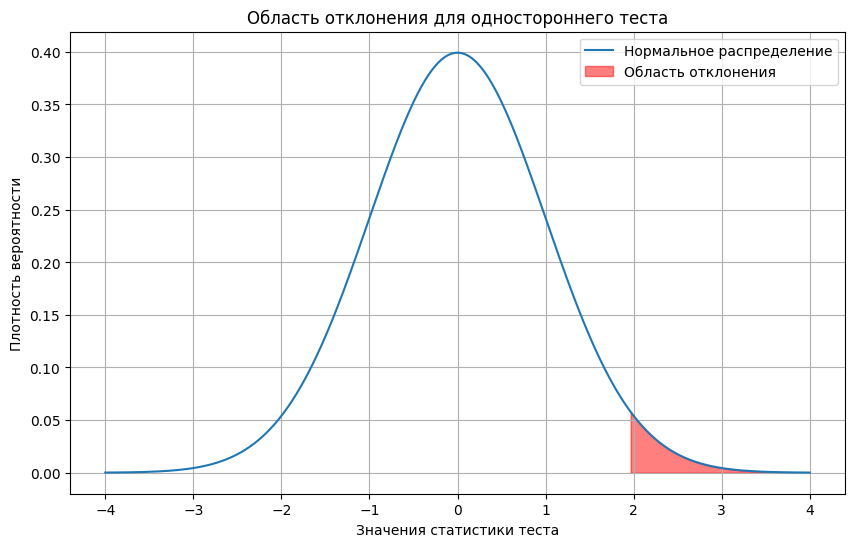

мы не будем рассматривать третий случай когда 
$$
H_0: \theta\geq\theta_0\\
H_1: \theta<\theta_0
$$
потому что это тот же самый случай

# упражненеия 4 12 3

Допустим у нас есть $X_1,...,X_n\sim^{iid} \text{Bern}(p)$. мы проводим стат тест что 
$H_0: p \leq 0.5\\
H_1: p>0.5$
на асимптотическом уровне 5%.
Пусть $\psi$ Wald Test



1) Предположим что истинное $p$ равно $0.2$ Каков предел $\lim_{n\to\infty}P_{0.2}[\psi=1]=?$, 

- Во первый распишем к чему стремиться переменная
- Потом определим что значит "асимптотический уровнь 5%".
- Распишем вероятность тесты выйти за пределы региона отклоненния.

мы должны помнить что нам нужно обосновать к чему стремиться поведение переменной.

Основываясь на CLT и теор. Случкого если $X_i\sim\text{Ber}(0.2)$, тогда 
$$Y:=\sqrt{n}\dfrac{\bar{X}_n-0.2}{\sqrt{\bar{X}_n(1-\bar{X}_n)}}\xrightarrow [n \to \infty ]{(d)}\mathcal{N}(0,1)$$

#### 5%
односторонний тест - значит площадь под интегралом правее от $\mathbb{P}[Z>q_\alpha]=5\%$ или $\alpha=5\%$, и соотв $q_\alpha=1-\alpha=0.95$?

In [27]:
from scipy.stats import norm
q_alpha = norm.ppf(0.95)
q_alpha

1.6448536269514722

Теперь распишем чему равен тест, если значение p выходит на область отвержения

Тест Wald
$$W=\dfrac{\hat{p}-\theta_0}{\sqrt{\widehat{\text{var}}(\hat{p})}}=\sqrt{n}\dfrac{\bar{X}_n-0.5}{\sqrt{\bar{X}_n(1-\bar{X}_n)}}$$

$\hat{p}=\bar{X}_n$\
$\sqrt{\widehat{\text{var}}(\hat{p})}=\sqrt{\dfrac{\hat{p}(1-\hat{p}}{n}}=\dfrac{\sqrt{\hat{p}(1-\hat{p}}}{\sqrt{n}}$

Тогда
$P_{0.2}[\psi=1]\\
\quad=P_{0.2}\left[\sqrt{n}\dfrac{\bar{X}_n-\theta_0}{\sqrt{\bar{X}_n(1-\bar{X}_n)}}>q_\alpha\right]=\\
\quad=P_{0.2}\left[\sqrt{n}\dfrac{\bar{X}_n-\theta_0}{\sqrt{\bar{X}_n(1-\bar{X}_n)}}>1.6448\right]=$

используем трюк, добавив отбавив значение которое нас интересует $0.2$


$P_{0.2}\left[\sqrt{n}\dfrac{\bar{X}_n-0.5+0.2-0.2}{\sqrt{\bar{X}_n(1-\bar{X}_n)}}>1.6448\right]=\\
\quad=P_{0.2}\left[\sqrt{n}\dfrac{\bar{X}_n-0.2}{\sqrt{\bar{X}_n(1-\bar{X}_n)}}+\sqrt{n}\dfrac{0.2-0.5}{\sqrt{\bar{X}_n(1-\bar{X}_n)}}>1.6448\right]=\\
\quad=P_{0.2}\left[\sqrt{n}\dfrac{\bar{X}_n-0.2}{\sqrt{\bar{X}_n(1-\bar{X}_n)}}+\sqrt{n}\dfrac{-0.3}{\sqrt{\bar{X}_n(1-\bar{X}_n)}}>1.6448\right]=$

К чему все это стремиться? У нас 2 слогаемых. 

*Первое слагаемое* - стремиться к $0$, потому что оно есть стандартное нормальное.\
*Второе слогаемое* при $n\to\infty$ стремиться к $-\infty$ из-за того что у нас отрицательное значение $-0.3$ и нет смещения переменной оценки параметра.

Получается что вся вероятность того что $0+(-\infty)>1.65=0$


$$\lim_{n\to\infty}P_{0.2}[\psi=1]=0$$


2) Для всех $\lambda>0$ мы может показать что 
$\lim_{n\to\infty}P_{0.5-\frac{\lambda}{\sqrt{n}}}[\psi=1]=P[Z>1.645+f(\lambda)]$

чему равная эта функция?

In [42]:
from scipy.stats import bernoulli as bern
from numpy import sqrt, mean

In [56]:
H_0 = 0.5
p = 0.5
n = 1000
alpha = 0.05
data = bern.rvs(p, size=n)

In [76]:
def wald_test(n, p, H_0, data,  alpha):
    q_alpha = norm.ppf(1-alpha)
    X_n = mean(data)
    var_p = sqrt(X_n*(1-X_n)/n)
    w_test = ((X_n-p)/var_p + (p-H_0)/var_p)
    return w_test, X_n, var_p, w_test>q_alpha, q_alpha

In [77]:
crit, X_n, Var_P, wtest, q_alpha = wald_test(n, p, H_0, data, alpha)
crit, X_n, Var_P, wtest, q_alpha

(0.6325820611000686, 0.51, 0.0158082257068907, False, 1.6448536269514722)

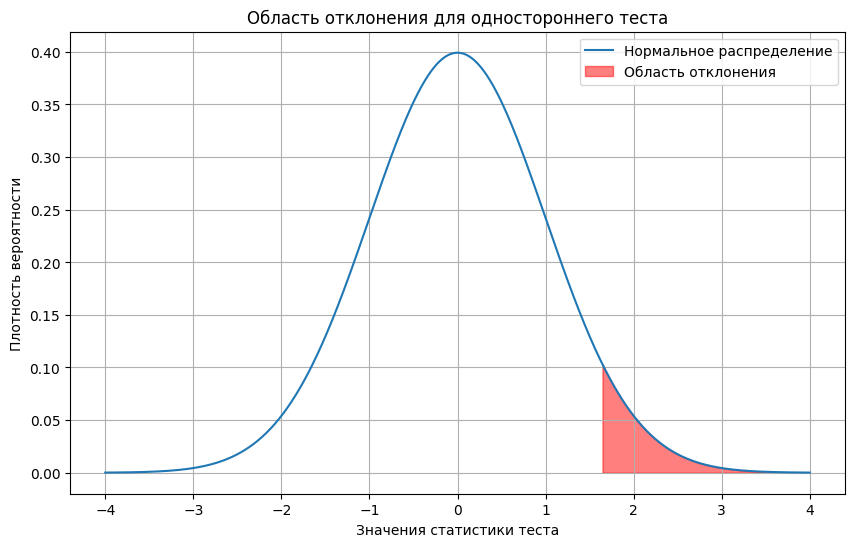

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Определяем параметры распределения и области отклонения
mu = 0  # среднее значение
sigma = 1  # стандартное отклонение
# alpha = 0.05  # уровень значимости

# Генерируем значения для нормального распределения
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Вычисляем критические значения для двухстороннего теста
z_crit = norm.ppf(1 - alpha)

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Нормальное распределение")

# Заполняем области отклонения
plt.fill_between(x, 0, y, where=(x >= z_crit), color='red', alpha=0.5, label="Область отклонения")

# Добавляем метки и легенду
plt.title("Область отклонения для одностороннего теста")
plt.xlabel("Значения статистики теста")
plt.ylabel("Плотность вероятности")
plt.legend()

# Показываем график
plt.grid(True)
plt.show()

In [104]:
H_0 = 0.5
n = 1000
lambda_ = 1
p = 0.5 + lambda_/sqrt(n)
alpha = 0.05
data = bern.rvs(p, size=n)
lambda_, p

(1, 0.5316227766016838)

In [105]:
def wald_test(n, p, H_0, data,  alpha):
    q_alpha = norm.ppf(1-alpha)
    X_n = mean(data)
    var_p = sqrt(X_n*(1-X_n)/n)
    w_test = ((X_n-p)/var_p + (p-H_0)/var_p)
    return w_test, X_n, var_p, w_test>q_alpha, q_alpha

In [177]:
crit, X_n, Var_P, wtest, q_alpha = wald_test(n, p, H_0, data, alpha)
crit, X_n, Var_P, wtest, q_alpha

(2.21903768068926, 0.535, 0.015772602828956293, True, 1.6448536269514722)

In [188]:
def reject_colors(rejection_rates, def_color):
    return np.array(list(map(lambda x: [def_color, 'x'][x], rejection_rates)))

In [200]:
n_trials = range(100, 100001, 5000)
list(n_trials)

[100,
 5100,
 10100,
 15100,
 20100,
 25100,
 30100,
 35100,
 40100,
 45100,
 50100,
 55100,
 60100,
 65100,
 70100,
 75100,
 80100,
 85100,
 90100,
 95100]

0.01 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [-0.4287464628562701, 0.6880951097111656, -0.7396710888409798, -0.22086074583499735, 0.43136491458505566, -0.3604838916144629, -0.3904285495370413, 1.0055734187296, -0.2442787850380629, 0.3018840165627702, -2.0365462608194584, -1.1230577137427702, 1.5887492021724137, -0.5737936167085967, -0.8588420477159401, -0.5548359635808483, 0.7412224526994153, 0.850699540413198, 0.6450000579780516, -1.3911453927456714]
0.1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [-0.6380091150886684, 0.42454747182706815, 0.35885007089650856, -1.2117817384232001, -0.39668703237827535, -0.22039538862394198, -0.8397897157619763, -0.6152222702648968, 0.8257094637147787, -0.4189745458420876, 0.43915879912599887, -0.09592322279026913, -0.8569443282830179, -0.31369630384617325, -0.8431942320603631, -0.3058943274935458, -1.791106956031824, -0.8127635479614218, -1.5647251791906616, -0.8713330961748518]
1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

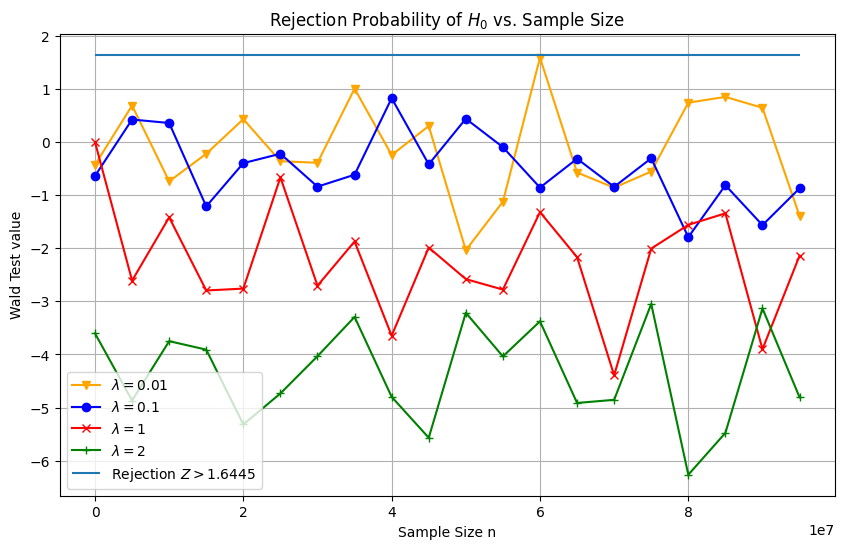

In [207]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_bernoulli_trials(p, n):
    return np.random.binomial(1, p, n)

def wald_test_statistic(data, p_null):
    p_hat = np.mean(data)
    se = np.sqrt(p_hat * (1 - p_hat) / len(data))
    return (p_hat - p_null) / se

def rejection_probability(lambda_value, n_trials, p_null=0.5, threshold=1.645):
    p_values = [p_null - lambda_value / np.sqrt(n) for n in n_trials]
    rejection_rates = []
    wald_stats = []

    for n, p in zip(n_trials, p_values):
        data = simulate_bernoulli_trials(p, n)
        wald_stat = wald_test_statistic(data, p_null)
        rejected = 1 if wald_stat > threshold else 0
        wald_stats.append(wald_stat)
        rejection_rates.append(rejected)

    return rejection_rates, wald_stats


plt.figure(figsize=(10, 6))

n_trials = list(range(100, 100000001, 5000000))

# Parameters
lambda_value = 0.01
rejection_rates, wald_stats = rejection_probability(lambda_value, n_trials, p_null=0.7)
print(lambda_value, rejection_rates, wald_stats)
# plt.plot(n_trials, rejection_rates, marker='v', color='orange')
plt.plot(n_trials, wald_stats, marker='v', color='orange', label=r'$\lambda='+str(lambda_value)+'$')

# Parameters
lambda_value = 0.1
rejection_rates, wald_stats = rejection_probability(lambda_value, n_trials, p_null=0.7)
print(lambda_value, rejection_rates, wald_stats)
# plt.plot(n_trials, rejection_rates, marker='o', color='blue')
plt.plot(n_trials, wald_stats, marker='o', color='blue', label=r'$\lambda='+str(lambda_value)+'$')

# Parameters
lambda_value = 1
rejection_rates, wald_stats = rejection_probability(lambda_value, n_trials, p_null=0.7)
print(lambda_value, rejection_rates, wald_stats)
# plt.plot(n_trials, rejection_rates, marker='x', color='red')
plt.plot(n_trials, wald_stats, marker='x', color='red', label=r'$\lambda='+str(lambda_value)+'$')

# Parameters
lambda_value = 2
rejection_rates, wald_stats = rejection_probability(lambda_value, n_trials, p_null=0.7)
print(lambda_value, rejection_rates, wald_stats)
# plt.plot(n_trials, rejection_rates, marker='+', color='green')
plt.plot(n_trials, wald_stats, marker='+', color='green', label=r'$\lambda='+str(lambda_value)+'$')
# Plotting

plt.hlines(1.6445, 0, n_trials[-1], label=r'Rejection $Z>1.6445$')

# plt.plot(n_trials, rejection_rates, marker='o')
plt.xlabel('Sample Size n')
plt.ylabel('Wald Test value')
plt.title('Rejection Probability of $H_0$ vs. Sample Size')
plt.grid(True)
plt.legend()
plt.show()

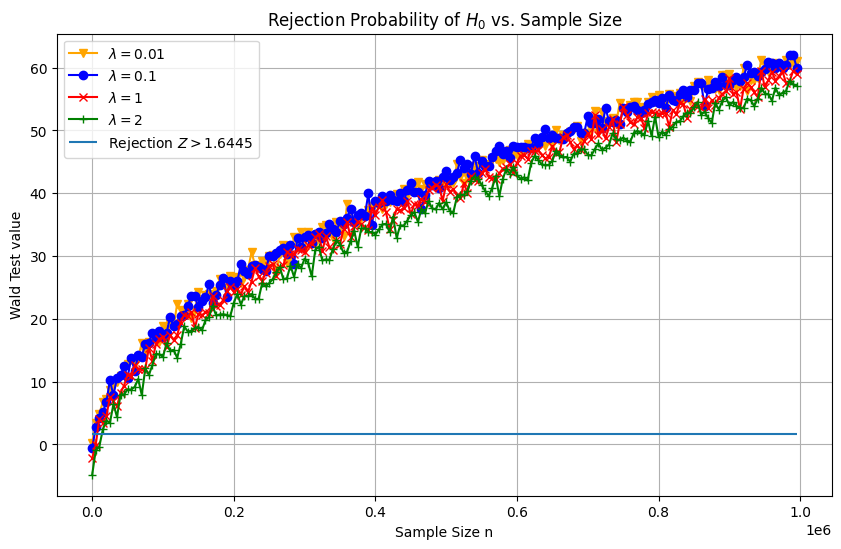

In [215]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_bernoulli_trials(p, n):
    return np.random.binomial(1, p, n)

def wald_test_statistic(data, p_null, lambda_):
    p_hat = np.mean(data)
    se = np.sqrt(p_hat * (1 - p_hat) / len(data))
    return (p_hat - (0.5-(lambda_/np.sqrt(n)))) / se - lambda_/np.sqrt(p_hat * (1 - p_hat))

def rejection_probability(lambda_value, n_trials, p_null=0.5, threshold=1.645):
    p_values = [p_null - lambda_value / np.sqrt(n) for n in n_trials]
    rejection_rates = []
    wald_stats = []

    for n, p in zip(n_trials, p_values):
        data = simulate_bernoulli_trials(p, n)
        wald_stat = wald_test_statistic(data, p_null, lambda_)
        rejected = 1 if wald_stat > threshold else 0
        wald_stats.append(wald_stat)
        rejection_rates.append(rejected)

    return rejection_rates, wald_stats


plt.figure(figsize=(10, 6))

n_trials = list(range(100, 1000001, 5000))

# Parameters
lambda_value = 0.01
rejection_rates, wald_stats = rejection_probability(lambda_value, n_trials, p_null=0.5)
# print(lambda_value, rejection_rates, wald_stats)
# plt.plot(n_trials, rejection_rates, marker='v', color='orange')
plt.plot(n_trials, wald_stats, marker='v', color='orange', label=r'$\lambda='+str(lambda_value)+'$')

# Parameters
lambda_value = 0.1
rejection_rates, wald_stats = rejection_probability(lambda_value, n_trials, p_null=0.5)
# print(lambda_value, rejection_rates, wald_stats)
# plt.plot(n_trials, rejection_rates, marker='o', color='blue')
plt.plot(n_trials, wald_stats, marker='o', color='blue', label=r'$\lambda='+str(lambda_value)+'$')

# Parameters
lambda_value = 1
rejection_rates, wald_stats = rejection_probability(lambda_value, n_trials, p_null=0.5)
# print(lambda_value, rejection_rates, wald_stats)
# plt.plot(n_trials, rejection_rates, marker='x', color='red')
plt.plot(n_trials, wald_stats, marker='x', color='red', label=r'$\lambda='+str(lambda_value)+'$')

# Parameters
lambda_value = 2
rejection_rates, wald_stats = rejection_probability(lambda_value, n_trials, p_null=0.5)
# print(lambda_value, rejection_rates, wald_stats)
# plt.plot(n_trials, rejection_rates, marker='+', color='green')
plt.plot(n_trials, wald_stats, marker='+', color='green', label=r'$\lambda='+str(lambda_value)+'$')
# Plotting

plt.hlines(1.6445, 0, n_trials[-1], label=r'Rejection $Z>1.6445$')

# plt.plot(n_trials, rejection_rates, marker='o')
plt.xlabel('Sample Size n')
plt.ylabel('Wald Test value')
plt.title('Rejection Probability of $H_0$ vs. Sample Size')
plt.grid(True)
plt.legend()
plt.show()

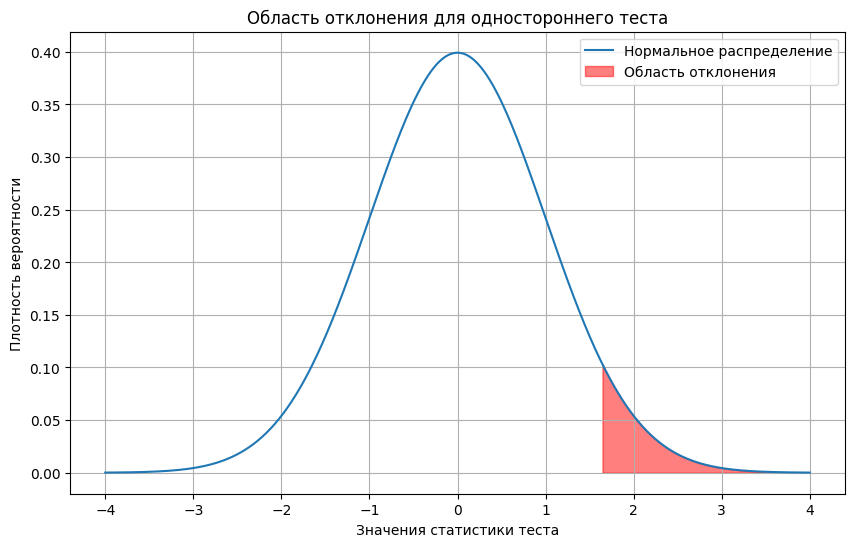

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Определяем параметры распределения и области отклонения
mu = 0  # среднее значение
sigma = 1  # стандартное отклонение
# alpha = 0.05  # уровень значимости

# Генерируем значения для нормального распределения
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Вычисляем критические значения для двухстороннего теста
z_crit = norm.ppf(1 - alpha)

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Нормальное распределение")

# Заполняем области отклонения
plt.fill_between(x, 0, y, where=(x >= z_crit), color='red', alpha=0.5, label="Область отклонения")

# Добавляем метки и легенду
plt.title("Область отклонения для одностороннего теста")
plt.xlabel("Значения статистики теста")
plt.ylabel("Плотность вероятности")
plt.legend()

# Показываем график
plt.grid(True)
plt.show()

## 4 p-Value for the wald test

2/3 американкцев получает новости из соц. сетей.

$X_1,\dots,X_n ~\text{Ber}(p), p in [0,1]$

$H_0:\quad p\leq2/3\\
H_1:\quad p>2/3$

у нас получилась выбрка n=4581 и оценка $\hat{p}=0.68$



$W^{obs}=\sqrt{4851}\dfrac{.68-2/3}{\sqrt{.68(1-.68)}}=1.93>1.645\,$ **Reject Null hyp.** \
$q_{0.05}=1-0.05=0.95=95\%$

## Найдем $\alpha_0$

Давайне найдем $p-$Value или $\alpha_0$ это такое наименьшее значение при мы отклоним нулевую гипотезу. Можно это выразить по другому. Что мне нужно поставить вместо $q_\alpha=1.6445$, чтобы мы отклонили нулевую гепотизу, или что-то что будет больше чем $q_{\alpha_0}=1.93$

$q_{\alpha_0}=1.93 \Leftrightarrow \mathbf{P}[Z>1.93]=1-0.9732=0.0268=2.68\%$

Значит при асимпт.  уровне $\alpha=0.0268$ мы отклоним гипотезу.

Тогда можно сказать, что при уровне $\alpha=1\%$ мы **Failed to Reject Null**


На рисунке видно, что меньшее значние $\alpha$ требует от данных больше значение теста, чтобы отклонить нулевую гипотезу.

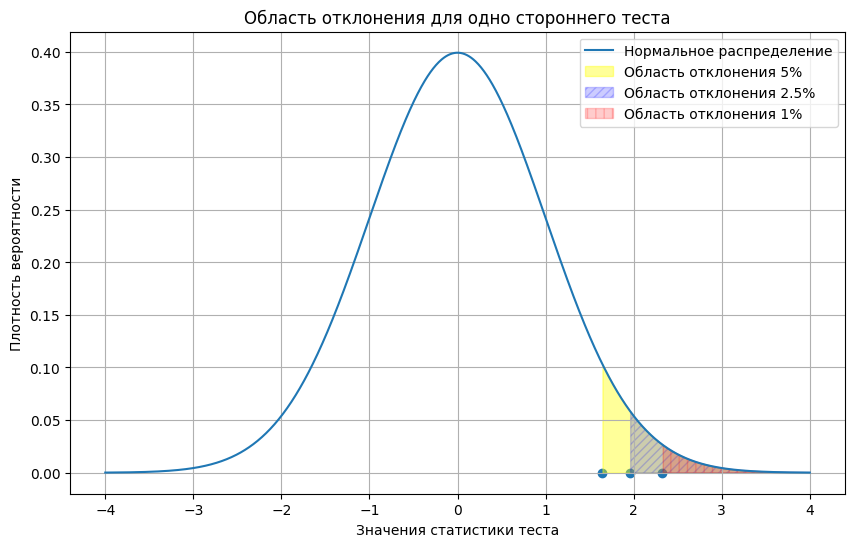

Для других тестов, можно воспользоваться таблицей которая поможет понять как искать p-value

$$W:=\dfrac{\hat\theta-\theta_0}{\sqrt{\widehat{\text{var}}(\hat\theta)}}$$

Мы обозначем через $W^{\text{obs}}$ реализацию (наблюдаемые значениея) $W$ в данной выборке. 

тогда $p-$value и асимптотическое $p-$Value данны в таблице.

| | $\begin{array}\ H_0:&\theta=\theta_0\\ H_1:&\theta\neq\theta_0\end{array}$| $\begin{array}\ H_0:&\theta\leq\theta_0\\ H_1:&\theta>\theta_0\end{array}$ | $\begin{array}\ H_0:&\theta\geq\theta_0\\ H_1:&\theta<\theta_0\end{array}$ |
|--|:--:|:--:|:--:|
|Wald test| $|W|>q_{\alpha/2}$ | $W>q_{\alpha}$  | $W<-q_{\alpha}$ |
|p-Value| $\mathbb{P}(|W|>|W^{\text{obs}}|)$ | $\mathbb{P}(W>W^{\text{obs}})$  | $\mathbb{P}(W<W^{\text{obs}})$ |
|asymp. p-Value| $\mathbb{P}(|Z|>|W^{\text{obs}}|)$ | $\mathbb{P}(Z>W^{\text{obs}})$  | $\mathbb{P}(Z<W^{\text{obs}})$ |


В случае с p-Value мы все сравниваем с наблюдаемым значением $W^{\text{obs}}$. Это сложно подсчитать потому что вероятность зависит от рспределенеия $W$ и не знаем распределения, если данные не гаусовы, или бернули и так далее.

Все становиться проще для асимптотического p-Value потому что мы знаем что $W$ сходится к нормальной гаусовой. и тогда мы сравниваем $W^{\text{obs}}$ с Z. где $Z\sim\mathcal{N}(0,1)$

# 5. Two-sample Wald test

Какой самый быстрый способ заполнить самолет - "с конца в начало" или "Окна, средние сиденья, у прохода".
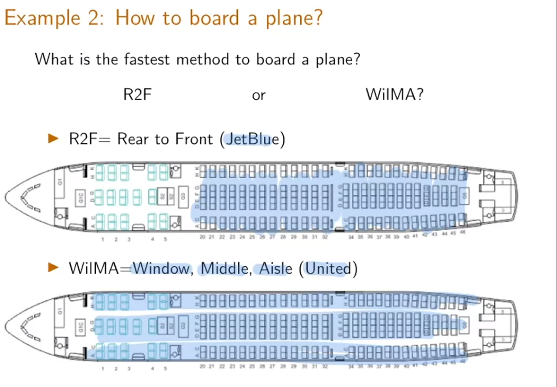

Это пример немного сложенее чем предыдущий, нам придется моделировать тут.

$X$ - время заполнения самолета JetBlue
$$\mathbb{E}[X]=\mu_1, \quad \text{var}[X]=\sigma_1^2$$
$Y$ - время заполнения самолета United Flight
$$\mathbb{E}[Y]=\mu_2, \quad \text{var}[Y]=\sigma_1^2$$

У нас две выборки, независимых. $X_1,\dots,X_n$ и $Y_1,\dots,X_m$

Гипотеза у нас след
$\begin{array}\
H_0:&\mu_1=\mu_2\\
H_1:&\mu_1\neq\mu_2
\end{array}$ на волнует наличие разници между методами

Этуже проблему можно перевести в другую форму $\theta=\mu_1-\mu_2$ тогда\
$\begin{array}\
H_0:&\theta=0\\
H_1:&\theta\neq0
\end{array}$

У нас Двух-Выборочная проблема.

Нам нужно определить асимптотически нормальный оценщик для $\hat\theta$

Самый простой и рабочий кандидат - это разница между среднеми из каждой выборки. 
$$\hat\theta=\bar{X}_n-\bar{Y}_m$$

Теперь применим CLT для нашей оценки $\hat\theta$ чтобы получить асимптотически нормальную пермеменную.

$\dfrac{\hat\theta-\theta}{\sqrt{\text{var}(\hat\theta)}}\xrightarrow [n \to \infty ]{(d)} \mathcal{N}(0,1)$

Мы еще **не готовы** применить тут Wald Test потому что у нас нет Оценки Дисперсии оценки резницы средних. Но до этого давайте попробуем понять чему равна дисперция оценки резницы средних.

Мы знаем что $X$ и $Y$ независимы друг от друга. И мы знаем что дисперсия разницы двух независимых переменных сумма дисперсий это разница двух 

$\text{var}(\hat\theta)=\text{var}(\bar{X}_n)+\text{var}(\bar{Y}_n)=\dfrac{\sigma_1^2}{n}+\dfrac{\sigma_2^2}{m}$

Дисперсия переменной $\text{var}(X)=\sigma_1^2=\mathbb{E}[(X-\mathbb[X])^2]$ и\
соотв.для $\text{var}(Y)=\sigma_2^2=\mathbb{E}[(Y-\mathbb[Y])^2]$
Для каджого из них мы заменим Ожидание на оценку средней из данных и подсчитаем срденее квадратное отклоненеие для данных и таким образом получим оценку дисперсии для каждой переменной.

мы можем оценить $\sigma_1^2$ через $\hat\sigma_1^2$ и $\sigma_2^2$ через $\hat\sigma_2^2$ для

$$\hat\sigma_1^2:=\frac{1}{2}\sum_{i=1}^2(X_i-\bar{X}_n)^2$$
$$\hat\sigma_2^2:=\frac{1}{2}\sum_{i=1}^2(Y_i-\bar{Y}_n)^2$$

Эти оценкия являеются **consisten** в соотв с LLN и conitues mapping theorem, потому что у нас кое-как сложная функция подсчета дисперсии и в соотв со Slutsky theorem.

ИТОГО! мы заменим в нашей функции дисперсию на оценку дисперсии
$$\widehat{\text{var}}(\hat\theta)=\dfrac{\hat\sigma_1^2}{n}+\dfrac{\hat\sigma_2^2}{m}$$


$$\dfrac{\hat\theta-\theta}{\sqrt{\dfrac{\hat\sigma_1^2}{n}+\dfrac{\hat\sigma_2^2}{m}}}\xrightarrow [n \to \infty \, m \to \infty ]{(d)} \mathcal{N}(0,1)$$


### Применим Wald test

$W=\dfrac{\hat\theta-0}{\sqrt{\dfrac{\hat\sigma_1^2}{n}+\dfrac{\hat\sigma_2^2}{m}}}$ $\psi=\mathbb{1}\{|W|>q_{\alpha/2}\}$


| | R2F | WilMA|
|:-:|:-:|:-:|
| Average (mins) | 24.2 | 25.9 |
| Std. Dev (mins) | 5.1 | 4.3 |
| Sample | 72 | 56 |

$W=\dfrac{24.2-25.9}{\sqrt{\frac{5.1^2}{72}+\frac{4.3^2}{56}}}=-2.04$

Отрицательное число значит что WilMA больше чем R2F, значит что R2F быстрее чем WilMA. 

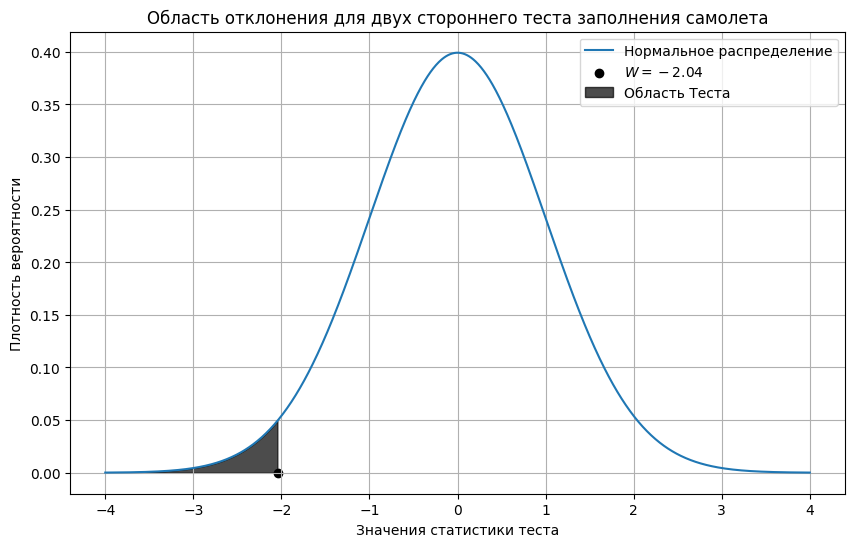

А этого достаточно чтобы отклонить тесты?

Да, мы видим что значение теста выходит за пределы уровня теста. Это значит что мы **Отклоняем нулевую гипотезу на асимптот. уровне 5%**

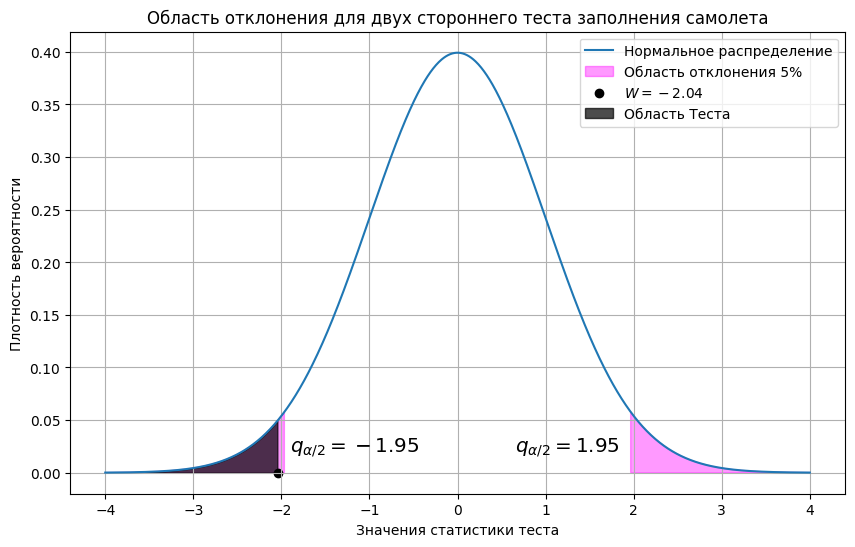

Чему равно p-Value или $\alpha_0$.

In [274]:
print(2*norm.cdf(-2.04))

0.041350325732140085


это у нас двухсотонний текст, подсчитаем p-value 

$\alpha_0=\mathbb{P}[|Z|>|-2.04|]=2\mathbb{P}[Z<-2.04]=4.14\%$

У нас сильный доказательство против нулевой гипотезы!


# упражненеия U4 L12 # 5

# 6. Other examples

## Время ожидания метро

ожидаем поезд на станции

$X_1,\dots,X_n\stackrel{iid}\sim\text{Exp}(\lambda)$

$\begin{array}\
H_0:&\lambda\geq1\\
H_1:&\lambda<1
\end{array}$

- Вспомним из 2го юнита что мы использовали Delta-Method получили оценку лямбда как $\hat\lambda=1/\bar{X}_n$\
$\sqrt{N}(\hat\lambda-\lambda)\xrightarrow[n\to\infty]{(d)}\mathcal{N}(0,\lambda^2)$
- В соотв. Случкий, уберем $\lambda^2$ и мы получаем\
$\sqrt{n}\dfrac{\hat\lambda-\lambda}{\hat\lambda}\xrightarrow[x\to\infty]{(d)}\mathcal{N}(0,1)$\
Это главный компонент для Wald-Test. единственное что нам остается это заменить $\lambda$ на нулевую гипотезу $H_0$

- Тест статистика \
$W=\sqrt{n}\frac{1}{\hat\lambda}(\hat\lambda-H_0)$

- Отклоняем нуль гипотезу на уровне 5% если $W<-q_\alpha=W<-1.645$


## MLE and the Wald Test

Я хер его знает. но!

CLT из предыдущего примера, что дает нам Asymptotic Normality Statement которое у нас есть для MLE, выдает нам сразу главный ингридиент для Wald Test'а. Получается мы можем определить Generic Wald тест основанный дя ML.

- Вспомним что у нас за statement для MLE\
$\sqrt{n}(\hat{\theta}^{\text{MLE}}-\theta)\xrightarrow[n\to\infty]{(d)}\mathcal{N}(0,\dfrac{1}{{I}(\theta)})$\
Где $\mathcal{I}(\theta)$ это **Fisher Infromation.**
- Используя Теор. Слуцкого\
$\sqrt{n\mathcal{I}(\theta)}(\hat\theta^{\text{MLE}}-\theta)\xrightarrow[n\to\infty]{(d)}\mathcal{N}(0,1)$\
Но этого не то что нужно для создания теста Wald'а, для теста нужно знать оценки дисперсии.\
Применим опять Слуцкий и Contineous mapping theorem мы можем установить шапку на $\theta$
- можно применить Wald Test
$W=\sqrt{n\mathbf{I}(\hat\theta^\text{MLE})}(\hat\theta^\text{MLE}-\theta_0)$


# 7. Кто такой **Abraham Wald** ?

- Это работал в математике и статистике. Доказал consistency MLE.
- Работал в геометрии, изгибы кривых. 
- Помогал во вторую мирову - чтобы самолеты не сбивали.
- Умер в авиокатастрофе в Индии.

# 8. Likelihood Ratio Test: Basic Form

введем основные понятия для Likelihood Ratio тест.


Пусть $X_1, \ldots , X_ n \stackrel{iid}{\sim } \mathbf{P}_{\theta ^*}$ и имеем ввиду ассоциированную модель $(E, \{  \mathbf{P}_{\theta } \} _{\theta \in \mathbb {R}^ d} )$. Предположем что $P_\theta$ дискретное распределение вероятности с pmf $p_\theta$

В основном LRT можно использовать для решения между двумя гипотезами.
$\begin{array}\
H_0:&\theta^*=\theta_0\\
H_1:&\theta^*=\theta_1
\end{array}$

Напомним себе что 
$$\begin{array}
\displaystyle  L_ n : \mathbb {R}^ n \times \mathbb {R}^d&\displaystyle \to \mathbb {R}\\
\displaystyle (x_1, \ldots , x_ n; \theta )&\displaystyle \mapsto \prod _{i =1}^ n p_\theta (x_ i).
\end{array}$$

Тогда **Likelihood ration test** в этих условиях имеет форму

$$\psi _ C = \mathbf{1}\left( \dfrac{L_ n(x_1, \ldots , x_ n; \theta _1 )}{L_ n(x_1, \ldots , x_ n; \theta _0 )} > C \right).$$

## Basic Likelihood Ratio Test

In [275]:
heads орел
tails решка

SyntaxError: invalid syntax (3215115568.py, line 1)

у нас есть не честная монетка.
Твой друг говорит что H появляется 25% или 75% но точно не знает.

Мы ставите эксперимент.

$X_1,\dots,X_n\stackrel{iid}\sim\text{Ber}(p^*)$, heads = 1, Tail = 0;

Соотв статистика эксперимента $(\{ 0,1 \} , \{ \text {Ber}(p)\} _{p \in (0,1)})$

Сформулируем гипотезу

$\begin{array}\
H_0:&p^*=0.25\\
H_1:&p^*=0.75
\end{array}$

Вы решаете использовать  LRT описаный выше с порогом $C=1$. Предположим вы наблюдаете результат одиного броска $X_1=1$

ВОПРОС - вы должны **Отклонить** или **не смочь отклонить** нулевую гипотезу?

ОТВЕТ

подсчитаем гиптезу

$\psi _ C = \mathbf{1}\left( \dfrac{L_ n(x_1, \ldots , x_ n; \theta _1 )}{L_ n(x_1, \ldots , x_ n; \theta _0 )} > C \right).$

$\psi_1\mathbb{1}\left(\dfrac{L_1(1;0.75)}{L_1(1;.25)}>1\right)$\
$\quad=\psi_1\mathbb{1}\left(\dfrac{.75}{.25}>1\right)$\
$\quad=\psi_1\mathbb{1}\left(3>1\right)$\
$\quad=\psi_1\mathbb{1}\left(3>1\right)=1$

Отклоняем, потому что в результате одного броска - тест дал 3 что выше порога 1.

Теперь предположим что мы бросили монетку много раз и получили
$\mathbf{X}= \{ 1, 0, 0, 0 ,1 ,1 , 1, 0 ,0 , 1, 0, 1, 0 , 0 , 0, 0\} .$
Используя LRT мы отклоним или не получиться отклонить нуль гипотезу.

6 - орел
10 - решка

поидее у нас будет как, ,75^6 в делимом, и .25^6 в делителе.

$L_{16}(H_1^6\cdot(1-H_1)^{10};.75)=L_{16}\left(\left(\dfrac{3}{4}\right)^{6}\left({\dfrac{1}{4}}\right)^{10}\right)$\
$L_{16}(H_0^6\cdot(1-H_0)^{10};.25)=L_{16}\left(\left(\dfrac{1}{4}\right)^{6}\left({\dfrac{3}{4}}\right)^{10}\right)$


$\psi_1\mathbb{1}\left(\dfrac{\left(\dfrac{3}{4}\right)^{6}\left({\dfrac{1}{4}}\right)^{10}}{\left(\dfrac{1}{4}\right)^{6}\left({\dfrac{3}{4}}\right)^{10}}>1\right)$\
$\quad=\psi_1\mathbb{1}\left(\dfrac{\dfrac{3^6}{4^{16}}}{\dfrac{3^{10}}{4^{16}}}>1\right)$\
$\quad=\psi_1\mathbb{1}\left(\dfrac{3^6}{3^{10}}>1\right)$\
$\quad=\psi_1\mathbb{1}\left(\dfrac{1}{27}>1\right)=0$

Ответ **FAIL TO REJECT**

# 9. Likelihood Ratio Test

мы обчно делаем тест на X оси. 

Likelihood - это уже Y ось, и мы хотим проводить тест на ней. 

Когда мы оцениваем $\theta_0$ которая колеблится вокруг $\widehat\theta^{\text{MLE}}$, мы можем оценивать колебание нового кандидата вокруг  уже выбранного через MLE. По Оси X мы види что новый кандидат не близок к существующему. Но по оси Y, Log Likelihood - они могут быть очень близко (красная линия)
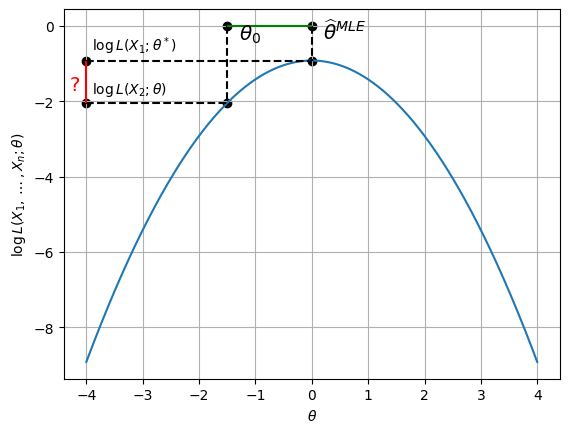
Для этого нам нужно понимать флуктуации Log Likelihood вокруг MLE. Сама функция $Log L$ это случайное значение, и значение ее максимуму тоже случайное число которое будет флуктуировать. Все что мы хотим понятьвыбрать кандидата на значение $\Theta$ рассматривая эти флуктуции.

Чтобы это определить мы проведем тест. Это называется **Likelihood Ratio Test** - это тест поможет нам выбрать между $\theta_0$ или $\theta_1$

У нас есть вектор $\theta$ который содержит $d$ параметров модели. из этих $d$ параметров, мы выбираем $r$ которые мы не трогаем.  А оставшиеся $d-r$ параметров - мы как раз и будем проверять (тестировать)

$\theta=\begin{bmatrix}
\color{gray}{\theta_1}\\
\dots\\
\color{gray}{\theta_r}\\
\color{red}{\theta_{r+1}}\\
\dots\\
\color{red}{\theta_d}\\
\end{bmatrix}$


- Как обычно мы начинаем с установки статистики\
$X_1,\dots,X_n$ iid, $(E,(\mathbb{P}_\theta)_{\theta\in\Theta})$ где $\Theta\in\mathbb{R}^d\,(d\geq1)$\
\
$\theta=\begin{bmatrix}
\theta_1\\
\dots\\
\theta_d
\end{bmatrix}\in\mathbb{R}^d\,(d\geq1)$ если $d=5$ тогда $\theta=\begin{bmatrix}
\theta_1\\
\theta_2\\
\theta_3\\
\theta_4\\
\theta_5\\
\end{bmatrix}\in\mathbb{R}^5$

- Предположим нулевую гипотезу\
$H_0: (\theta_{r+1},\dots,\theta_d)=(\theta_{r+1}^{(0)},\dots,\theta_{d}^{(0)})$ **$\quad\quad\theta_{i}^{(0)}$ - это есть $\theta_0$ под индексом $i$ таким образом мы говорим что у нас много $\theta_0$ (читается как "theta not", "theta нулевой гипотезы") и они разные**\
для некоторых фиксированных данных чисел $\theta_{r+1}^{(0)},\dots,\theta_{d}^{(0)}$ - то есть последние $r$ координат будет равны чему-то очень конкретному. Если $d=1$ и $r=0$ тогда это просто проверка если $\theta=\theta_0\Rightarrow\,H_0: (\theta_{1})=(\theta_{1}^{(0)})$. *Получается что мы как бы проверяем если последние параметры должны соотв чему-то конкретному. Но по факту, **последние** - это не важно, мы как бы выбираем **какие-то** значения из возможного набора значений*

- Чтобы проверить эти $d-r$ параметров, пусть\
$$\hat\theta_n=\text{argmax}_{\theta\in\Theta}\ell_n(\theta)\quad \text{MLE}$$\
и \
$$\hat\theta_n^c=\text{argmax}_{\theta\in\Theta_0}\ell_n(\theta)\quad \text{Constrained MLE}$$\
$\hat\theta_n^c$ - это ограниченный/стесненный максимайзер $\ell_n(\theta)$ над $\theta\in\Theta_0$ - это значит что, вместо того чтобы максимизировать через все $\theta_{[1,d]}$, мы будем максимизироват только над $\theta_{[r+1,d]}$. Для этого у нас есть $\ln(\theta)=\log \ell(X_1,X_2,\dots,X_n,\theta)=\log \ell(X_1,\dots,X_n;\theta_0,\dots\theta_r,\theta_{r+1},\dots,\theta_d)$. Часть параметров, c $r+1$ до $d$, мы возьмем из множества $\Theta_0$.  $\Theta_0$ это набор для которого гипотезу $H_0$ предполагается истинной. И поэтому мы максимизируем функцию над $\Theta_0$ тоесть $\log\ell(X_1,\dots,X_n;\theta_1,\dots,\theta_r,\theta_{r+1}^{(0)},\dots,\theta_{d}^{(0)})$\
\
где $\Theta_0=\left\{\theta\in\Theta:(\theta_{r+1},\dots,\theta_{d})=(\theta_{r+1}^{(0)},\dots,\theta_{d}^{(0)})\right\}$

Итого у нас получилось две функции

$\ell_n(\hat\theta_n)$ и $\ell_n(\hat\theta_n^c)$
- $\ell_n(\hat\theta_n)$ - максимизирует значения $\ell_n(\theta)$ по определению подставляя $\theta=\hat\theta_n$
- $\ell_n(\hat\theta_n^c)$ - максимизирует значения $\ell_n(\theta)$ ограничивая значение $\theta_r,\dots,\theta_d$ параметров набором $\Theta_0$


Мы можем сказать что $\ell_n(\hat\theta_n)>\ell_n(\hat\theta_n^c)$ потому что $\ell_n(\hat\theta_n)$ это максимум $\ell_n(\theta)$ над всем возможными параметрами $\theta$, в то время как $\ell_n(\hat\theta_n^c)$ максимизирует $\ell_n(\theta)$ только над $\theta\in\Theta_0$

---

## Wilk's Theorem

Посмотрим на тест статистику

$$T_n=2\left(\ell_n(\hat\theta_n)-\ell_n(\hat\theta_n^c)\right)$$
мы точно можем сказать что эта статистика - всегда не негативная. *умножаем на 2, потому что 1/2 это second-order Taylor expansion.*

У этой статистики есть определенное распределение.
Предположим что $H_0$ истинно и MLE технические условия соблюдены
$$T_n\xrightarrow[n\to\infty]{(d)}\chi_{d-r}^2$$
В этом случае количество степеней свободы равно $d-r$ - почему? Из предположений выше мы позволили меняться $d-r$ параметрам.
Если бы мы указали число свобод $r$ и установили $r=0$, $\chi_0^2$ - тогда ничто не может изменяться. Тогда мы на самом деле тестируем если $\hat\theta=\theta_0$, а если $\hat\theta==\theta_0$, то как минимум $Wald'test$ говорит нам что предел распределения квадрата - должно вести себя как $\chi_d^2$ с $d-0$ степенями свободы. Что в точности является "second order Taylor expansion"


Likelihood ratio test с асмптотическим уровнем $\alpha\in(0,1)$
$$\psi=\mathcal{1}\{T_n>q_\alpha\}$$
где $q_\alpha$ это $(1-\alpha)$ квантиль $\chi_{d-r}^2$




# Упражнение

# Code

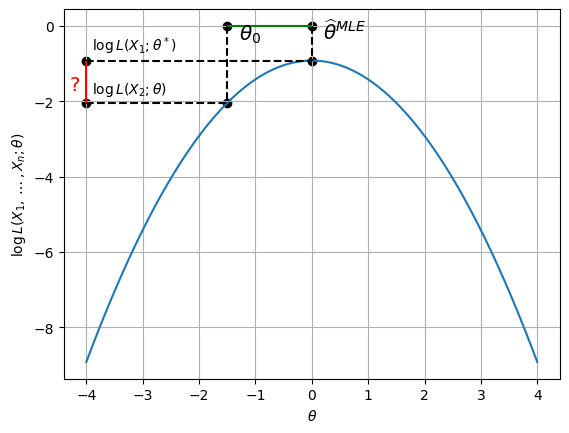

In [352]:
x = np.linspace(-4, 4, 1000)
norm_rv = norm(10,3)
plt.plot(x, np.log(norm.pdf(x)))
x_1 = -1.5
x_2 =  0
lines = [x_1,x_2]

plt.vlines(lines, ymin=[0,0],ymax= np.log(norm.pdf(lines)), color='black', linestyles='dashed')
plt.hlines(np.log(norm.pdf(lines)), xmin=[-4,-4], xmax=lines, color='black', linestyles='dashed')
plt.hlines(0, xmin=x_1, xmax=x_2, color='green')
plt.scatter([x_1,x_2,x_1,x_2, -4,-4],[0,0, np.log(norm.pdf(x_1)), np.log(norm.pdf(x_2)), np.log(norm.pdf(x_1)), np.log(norm.pdf(x_2))], color='black')
plt.vlines(-4, ymin=np.log(norm.pdf(x_1)),ymax= np.log(norm.pdf(x_2)), color='red', linestyles='solid')
plt.text(-4.3,  np.log(0.18), '?', color="red", fontdict={"fontsize":'x-large'})
plt.text(0.2,   np.log(0.7),   r'$\widehat{\theta}^{MLE}$', fontdict={"fontsize":'x-large'})
plt.text(-1.3,  np.log(0.7),   r'$\theta_0$', fontdict={"fontsize":'x-large'})
plt.text(-3.9,  np.log(0.53),  r'$\log L(X_1;\theta^*)$')
plt.text(-3.9,  np.log(0.170), r'$\log L(X_2;\theta)$')
plt.ylabel(r'$\log L(X_1,\dots,X_n;\theta)$')
plt.xlabel(r'$\theta$')
plt.grid(True)
plt.show()

In [270]:
1-.9793

0.02070000000000005

In [272]:
2*norm.cdf(-2.04)

0.041350325732140085

0.049800087735070775


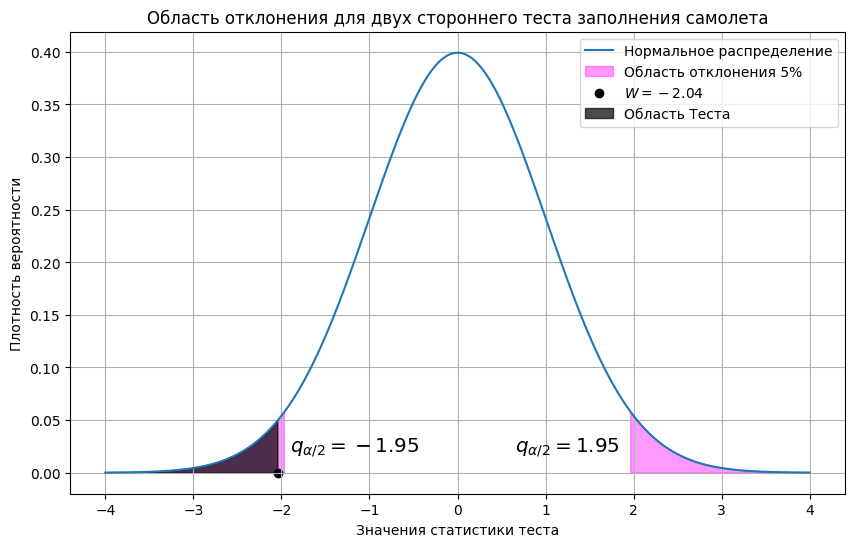

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Определяем параметры распределения и области отклонения
mu = 0  # среднее значение
sigma = 1  # стандартное отклонение
alpha = 0.05  # уровень значимости

# Генерируем значения для нормального распределения
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Вычисляем критические значения для двухстороннего теста
z_crit = norm.ppf(1 -alpha/2)

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Нормальное распределение")
# точки на графике
# plt.scatter([z_crit,-z_crit],[0,0], color='magenta', label=r'$q_{\alpha/2}$')

plt.text(0.65, 0.02, r'$q_{\alpha/2}='+str(z_crit)[:4]+'$', fontdict={"fontsize":'x-large'}, color='black')
plt.text(-1.9, 0.02, r'$q_{\alpha/2}='+str(-z_crit)[:5]+'$', fontdict={"fontsize":'x-large'}, color='black')
# Заполняем области отклонения
plt.fill_between(x, 0, y, where=(x < -z_crit)|(x >= z_crit), color='magenta', alpha=0.4, label="Область отклонения 5%")


# результатыт теста 
wald_test = -2.04
plt.scatter([wald_test],[0], color='black', label=r'$W=-2.04$')
plt.fill_between(x, 0, y, where=(x < wald_test), color='black', alpha=0.7, label="Область Теста")

# считаем значение p-value для теста
p_value = 2*norm.cdf(-2.04)

p_value

# Добавляем метки и легенду
plt.title("Область отклонения для двух стороннего теста заполнения самолета")
plt.xlabel("Значения статистики теста")
plt.ylabel("Плотность вероятности")
plt.legend()

# Показываем график
plt.grid(True)
plt.show()

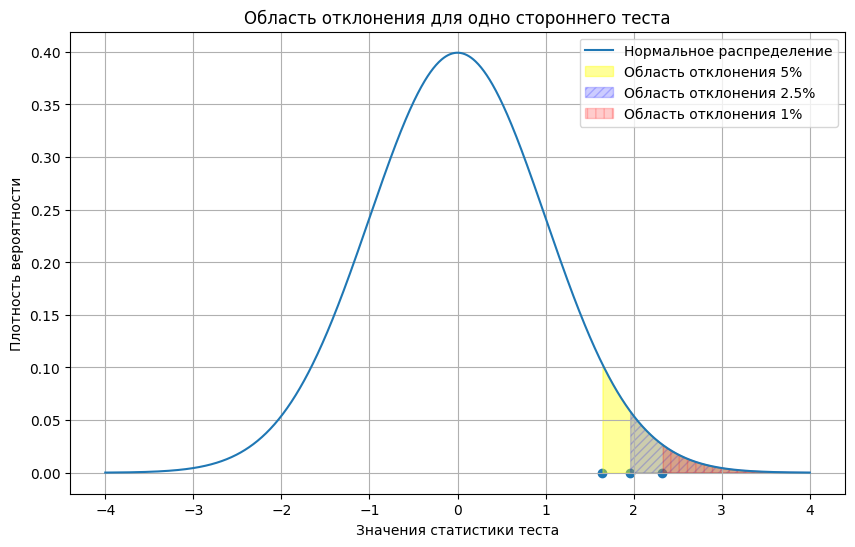

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Определяем параметры распределения и области отклонения
mu = 0  # среднее значение
sigma = 1  # стандартное отклонение
alpha = 0.05  # уровень значимости

# Генерируем значения для нормального распределения
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Вычисляем критические значения для двухстороннего теста
z_crit1 = norm.ppf(1 - 0.05)
z_crit2 = norm.ppf(1 - 0.025)
z_crit3 = norm.ppf(1 - 0.01)

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Нормальное распределение")
plt.scatter([z_crit1,z_crit2,z_crit3],[0,0,0])c

# Заполняем области отклонения
plt.fill_between(x, 0, y, where=(x >= z_crit1), color='yellow', alpha=0.4, label="Область отклонения 5%")
plt.fill_between(x, 0, y, where=(x >= z_crit2), color='blue', alpha=0.2, label="Область отклонения 2.5%", hatch='////')
plt.fill_between(x, 0, y, where=(x >= z_crit3), color='red', alpha=0.2, label="Область отклонения 1%",   hatch='||')

# Добавляем метки и легенду
plt.title("Область отклонения для одно стороннего теста")
plt.xlabel("Значения статистики теста")
plt.ylabel("Плотность вероятности")
plt.legend()

# Показываем график
plt.grid(True)
plt.show()

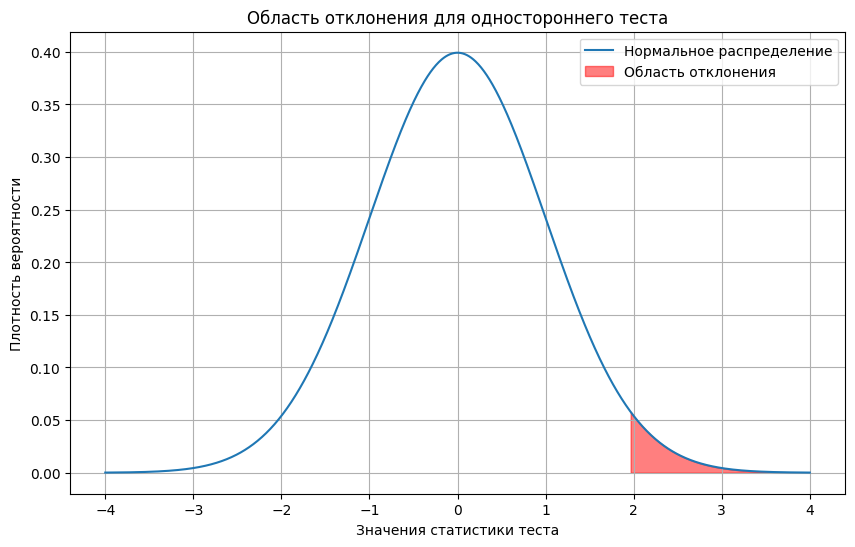

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Определяем параметры распределения и области отклонения
mu = 0  # среднее значение
sigma = 1  # стандартное отклонение
alpha = 0.05  # уровень значимости

# Генерируем значения для нормального распределения
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Вычисляем критические значения для двухстороннего теста
z_crit = norm.ppf(1 - alpha/2)

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Нормальное распределение")

# Заполняем области отклонения
plt.fill_between(x, 0, y, where=(x <= -z_crit) | (x >= z_crit), color='red', alpha=0.5, label="Область отклонения")

# Добавляем метки и легенду
plt.title("Область отклонения для стороннего теста")
plt.xlabel("Значения статистики теста")
plt.ylabel("Плотность вероятности")
plt.legend()

# Показываем график
plt.grid(True)
plt.show()